In [1]:
import numpy as np
import pandas as pd
import ast
from sentence_transformers import util
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.model_selection import GridSearchCV


In [4]:
jokes = pd.read_csv('combined_dataframe_only_with_questionmarks_only_good_explanations_manuallyfiltered_EMBEDDINGS_minilm_openai_COMPLETE_with_score_and_metrics_ONLY_ALL_CLASSES_MANUALLY_CLEANED_embeds_metrics_tiny_selection_no_omophones.csv')


In [7]:
jokes

,index,setup,punchline,central_expression,explanation,sentence1,sentence2,score,score_class,emb_minilm_setup,...,emb_openai_sentence1,emb_openai_sentence2,minilm_obviousness,minilm_compatibility,minilm_symmetry,minilm_comparison,openai_obviousness,openai_compatibility,openai_symmetry,openai_comparison
0,2,Why did the cook go to jail?,he was caught beating the egg,beating,Literal meaning: In cooking to beat an egg me...,She beat the eggs vigorously before adding th...,The suspect was arrested after allegedly beat...,0.0,0.0,"[0.0205070860683918, 0.06139203533530235, -0.0...",...,"[0.02929336205124855, -0.021888582035899162, 0...","[-0.020598527044057846, -0.010459757409989834,...",0.256630,0.409498,-0.152868,0.452507,0.387086,0.469080,-0.081994,0.387084
1,0,What do you call ghosts that haunt liquor stores?,spirits,spirits,"In the context of this joke, spirits refers to...",Many religions believe in the existence of sp...,"After a long day at work, many people enjoy u...",9.0,1.0,"[-0.00029177297255955637, 0.018897240981459618...",...,"[0.019595112651586533, 0.016181860119104385, -...","[-0.017984991893172264, -0.0015226304531097412...",0.290149,0.553695,-0.263547,0.543695,0.436476,0.349669,0.086808,0.436607
2,1,Why did the cookie get fired from his job?,he came to work baked.,baked,The term baked can mean being under the influ...,The chefs baked the cookies until they were g...,He was so baked that he couldnt remember wher...,8.0,1.0,"[-0.03357457369565964, 0.03339084982872009, 0....",...,"[-0.0004587018338497728, -0.03543522208929062,...","[-6.550754915224388e-05, -0.08035273849964142,...",0.458660,0.561099,-0.102438,0.554681,0.474683,0.508957,-0.034273,0.474731
3,2,Why did the robot get the electric chair?,because he was charged with battery.,battery,The word battery refers to the device that st...,The flashlight needed a new battery to work.,He was accused of battery for hitting the oth...,8.0,1.0,"[-0.02817765437066555, 0.09666495770215988, -0...",...,"[0.036087341606616974, -0.03580281510949135, -...","[-0.00908402819186449, -0.02842441014945507, -...",0.267845,0.647703,-0.379858,0.442571,0.400712,0.689857,-0.289145,0.400712
4,3,What do you call a beaten up pretzel?,a salted pretzel,salted,"Salted refers to being covered with salt, whe...",The salted peanuts were served as a snack at ...,He was in a salted state after the loss of th...,5.0,1.0,"[-0.06551312655210495, 0.04655187577009201, -0...",...,"[-0.003992448560893536, -0.009002037346363068,...","[-0.008167664520442486, -0.0002854755730368197...",0.347521,0.389018,-0.041497,0.708139,0.648624,0.407232,0.241392,0.648624
5,4,What do you call a sad tree?,mourning wood.,mourning,Referring to the act of expressing sorrow as ...,The mourning period for the deceased can last...,The table was made of beautiful wood that had...,1.0,1.0,"[0.030729467049241066, 0.050006166100502014, 0...",...,"[0.0010938141494989395, 0.04412606358528137, 0...","[-0.03133253753185272, 0.01886613667011261, 0....",0.156256,0.427145,-0.270889,0.540594,0.379599,0.353052,0.026547,0.379599
6,5,What does an orphan and a bottle of champagne ...,they both lost their pop.,pop,The word pop can mean a father (first meaning...,She used to see her pop every weekend before ...,As the clock struck midnight she opened the b...,8.0,1.0,"[-0.04759660363197327, 0.05806254968047142, -0...",...,"[0.001259853015653789, 0.01535424217581749, -0...","[0.03523771092295647, 0.02371041290462017, -0....",0.147478,0.298645,-0.151168,0.273397,0.329165,0.249984,0.079182,0.329165
7,6,Did you hear about the broken pencil?,its pointless.,pointless,The pun plays on the double meaning of 'point...,The blade was dull and pointless making it har...,The meeting felt completely pointless since no...,2.0,1.0,"[-0.11045631766319275, -0.008452646434307098, ...",...,"[-0.022543754428625107, 0.005881267599761486, ...","[-0.04237602651119232, 0.004566275980323553, 0...",0.358418,0.460994,-0.102576,0.056664,0.157032,0.489573,-0.332541,0.157032
8,

In [9]:
print (jokes.iloc[0]['setup'], jokes.iloc[0]['punchline'], jokes.iloc[0]['sentence1'], jokes.iloc[0]['sentence2']) 

Why did the cook go to jail?  he was caught beating the egg  She beat the eggs vigorously before adding them to the cake batter.  The suspect was arrested after allegedly beating a man during an argument.


In [6]:
# Check the distribution of classes in y_train
class_counts = jokes['score_class'].value_counts()
print(class_counts)

score_class
1.0    7
2.0    6
3.0    5
4.0    3
0.0    1
Name: count, dtype: int64


In [14]:
def metrics (y_true, y_predicted):
    accuracy = accuracy_score(y_true, y_predicted)
    print("Accuracy: ", accuracy)
    precision = precision_score(y_true, y_predicted, average='weighted')
    print("Précision: ", precision)
    recall = recall_score(y_true, y_predicted, average='weighted')
    print("Recall: ", recall)
    f1 = f1_score(y_true, y_predicted, average='weighted')
    print("F1-score: ", f1)
    conf_mat = confusion_matrix(y_true, y_predicted, normalize='all')
    print("Confusion Matrix:\n", conf_mat)


# ======
# MINILM
# ======

In [15]:
subset_df = jokes[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison', 'score_class']].copy()
data = subset_df[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison']] 
target = subset_df['score_class']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=40)


In [16]:
filtered_jokes = jokes[jokes['score'] > 1000]
filtered_jokes = filtered_jokes[filtered_jokes['minilm_symmetry'] < 0.1]
for row in filtered_jokes.itertuples():
    print(row.score, " - ", row.setup, row.punchline, " | symmetry: ", row.minilm_symmetry)

1795.0  -  What do you call a cheap circumcision?  A rip-off.  | symmetry:  -0.3139704763889313
1632.0  -  What is the hardest part about being a pedophile?  fitting in  | symmetry:  -0.1884518563747406
1486.0  -  Why is leather armor best for sneaking?  its literally made of hide  | symmetry:  -0.1625584065914154


In [17]:
filtered_jokes = jokes[jokes['score'] < 10]
filtered_jokes = filtered_jokes[filtered_jokes['minilm_symmetry'] < 0.1]
for row in filtered_jokes.itertuples():
    print(row.score, " - ", row.setup, row.punchline, " | symmetry: ", row.minilm_symmetry)

0.0  -  Why did the cook go to jail?  he was caught beating the egg  | symmetry:  -0.1528678238391876
9.0  -  What do you call ghosts that haunt liquor stores?  spirits  | symmetry:  -0.2635467052459717
8.0  -  Why did the cookie get fired from his job?  he came to work baked.  | symmetry:  -0.1024382412433624
8.0  -  Why did the robot get the electric chair?  because he was charged with battery.  | symmetry:  -0.3798576593399048
5.0  -  What do you call a beaten up pretzel?  a salted pretzel  | symmetry:  -0.0414966344833374
1.0  -  What do you call a sad tree?  mourning wood.  | symmetry:  -0.2708891779184341
8.0  -  What does an orphan and a bottle of champagne have in common?  they both lost their pop.  | symmetry:  -0.1511675417423248
2.0  -  Did you hear about the broken pencil?  its pointless.   | symmetry:  -0.1025764644145965


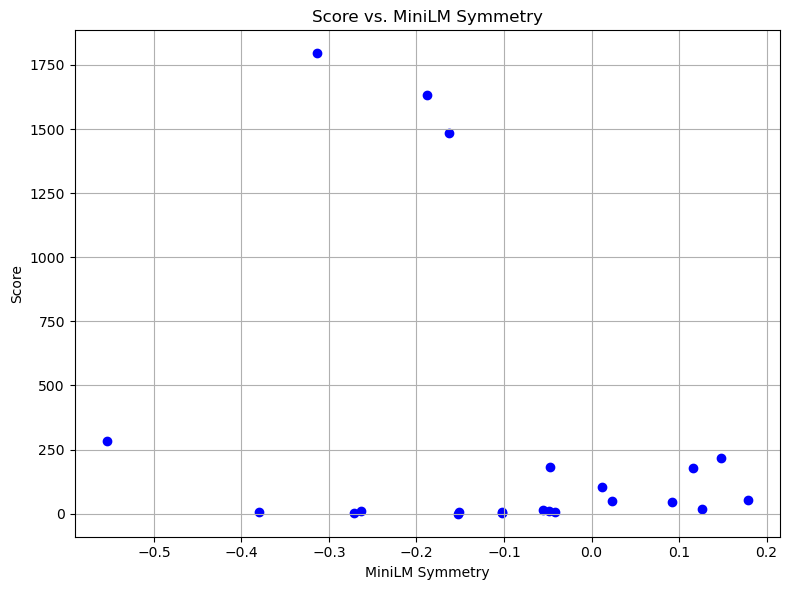

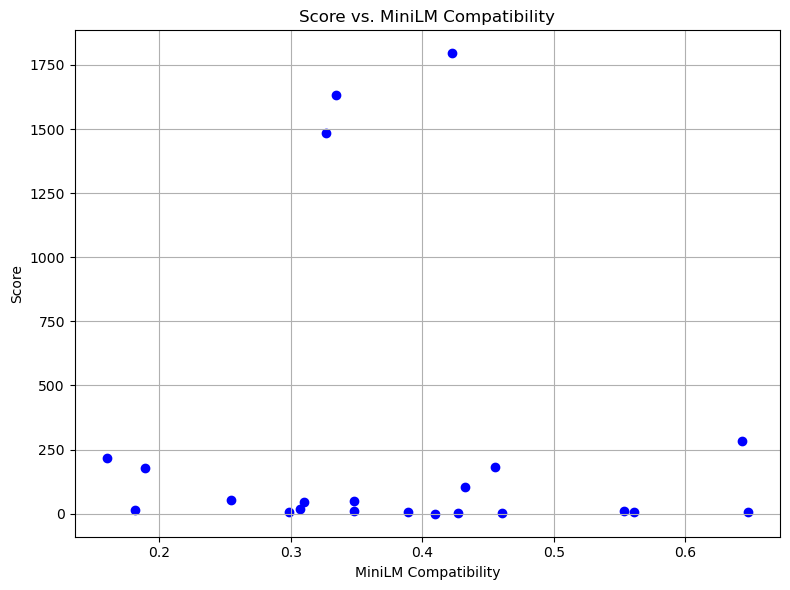

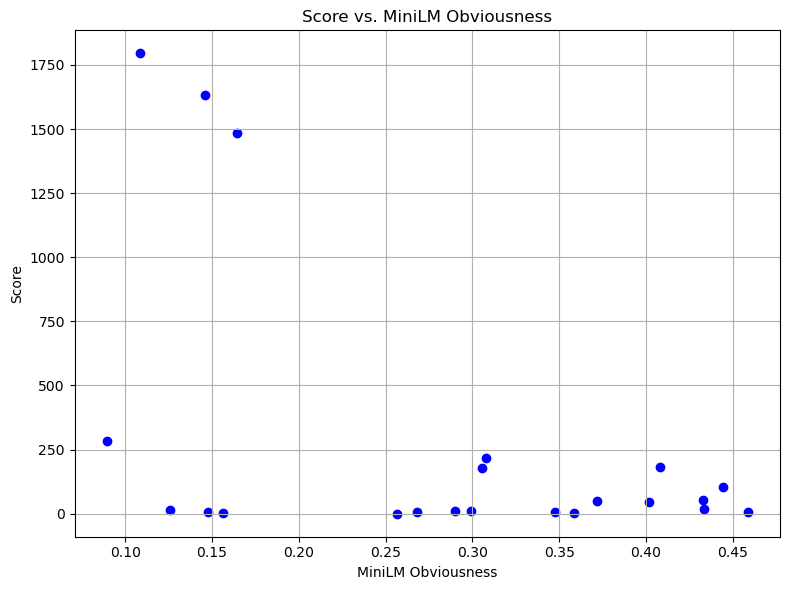

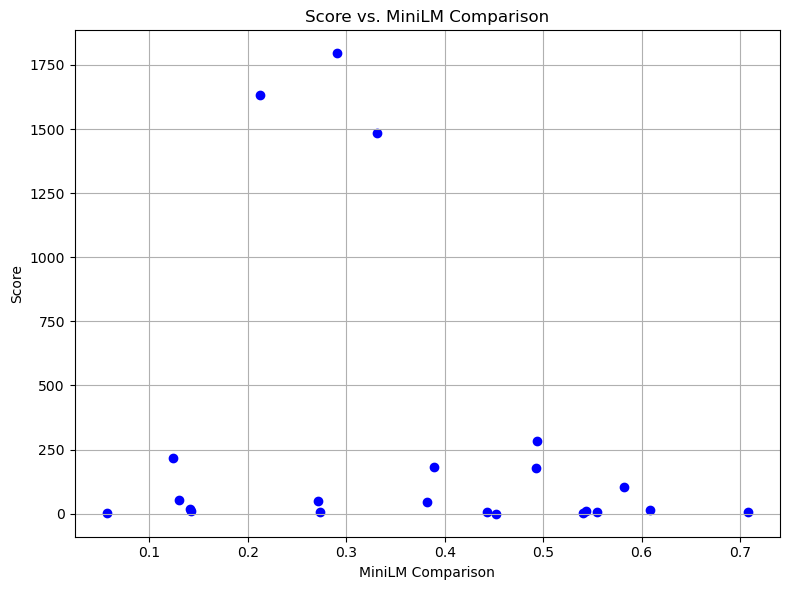

In [21]:

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_symmetry'], jokes['score'], color='blue')
plt.xlabel('MiniLM Symmetry')
plt.ylabel('Score')
plt.title('Score vs. MiniLM Symmetry')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_compatibility'], jokes['score'], color='blue')
plt.xlabel('MiniLM Compatibility')
plt.ylabel('Score')
plt.title('Score vs. MiniLM Compatibility')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_obviousness'], jokes['score'], color='blue')
plt.xlabel('MiniLM Obviousness')
plt.ylabel('Score')
plt.title('Score vs. MiniLM Obviousness')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_comparison'], jokes['score'], color='blue')
plt.xlabel('MiniLM Comparison')
plt.ylabel('Score')
plt.title('Score vs. MiniLM Comparison')
plt.grid(True)
plt.tight_layout()
plt.show()


# SVM

In [22]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



Accuracy:  0.4
Précision:  0.16000000000000003
Recall:  0.4
F1-score:  0.22857142857142856
Confusion Matrix:
 [[0.         0.06666667 0.         0.         0.        ]
 [0.         0.4        0.         0.         0.        ]
 [0.         0.26666667 0.         0.         0.        ]
 [0.         0.2        0.         0.         0.        ]
 [0.         0.06666667 0.         0.         0.        ]]

Accuracy:  0.14285714285714285
Précision:  0.02040816326530612
Recall:  0.14285714285714285
F1-score:  0.03571428571428571
Confusion Matrix:
 [[0.14285714 0.         0.         0.        ]
 [0.28571429 0.         0.         0.        ]
 [0.28571429 0.         0.         0.        ]
 [0.28571429 0.         0.         0.        ]]


/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



Accuracy:  0.8666666666666667
Précision:  0.8666666666666667
Recall:  0.8666666666666667
F1-score:  0.8666666666666667
Confusion Matrix:
 [[0.06666667 0.         0.         0.         0.        ]
 [0.         0.4        0.         0.         0.        ]
 [0.         0.         0.2        0.06666667 0.        ]
 [0.         0.         0.06666667 0.13333333 0.        ]
 [0.         0.         0.         0.         0.06666667]]

Accuracy:  0.0
Précision:  0.0
Recall:  0.0
F1-score:  0.0
Confusion Matrix:
 [[0.         0.14285714 0.         0.        ]
 [0.         0.         0.28571429 0.        ]
 [0.28571429 0.         0.         0.        ]
 [0.28571429 0.         0.         0.        ]]


/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Random forest

In [ ]:
# Define the classifier
clf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100, 200, 300],           # number of trees
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],          # None means full depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],      # minimum samples to split a node
}

# Setup grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Use the optimized model
clf = grid_search.best_estimator_






# Create and train the random forest (depth determined automatically)
#clf = RandomForestClassifier(max_depth=5)  # n_estimators is number of trees
clf.fit(x_train, y_train)

# Plot one of the trees in the forest for visualization
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)  # Plot the first tree in the ensemble
plt.show()



y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)

# Regression

In [24]:
subset_df = jokes[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison', 'score']].copy()
data = subset_df[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison']]
target = subset_df['score']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=40)


# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Coefficients: [-1006.15942464  -531.48026722 -1537.63969186  -869.7268618 ]
Intercept: 1105.7532849611707
Mean squared error: 239044.3861828838
R² score: 0.21202478034115768


# ======
# OPENAI
# ======

In [ ]:
subset_df = jokes[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison', 'score_class']].copy()
data = subset_df[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison']] 
target = subset_df['score_class']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=40)


# SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



# Random forest

In [ ]:
# Define the classifier
clf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100, 200, 300],           # number of trees
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],          # None means full depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],      # minimum samples to split a node
}

# Setup grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Use the optimized model
clf = grid_search.best_estimator_






# Create and train the random forest (depth determined automatically)
#clf = RandomForestClassifier(max_depth=5)  # n_estimators is number of trees
clf.fit(x_train, y_train)

# Plot one of the trees in the forest for visualization
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)  # Plot the first tree in the ensemble
plt.show()



y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)

# Regression

In [19]:
subset_df = jokes[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison', 'score']].copy()
data = subset_df[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison']]
target = subset_df['score']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=40)


# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Coefficients: [  458929.48565732   457851.7590035    916781.24466081 -1376292.7455068 ]
Intercept: 860.0996504629506
Mean squared error: 261027.5498474516
R² score: 0.057143831669348555


In [31]:
print(jokes[['openai_obviousness', 'score', 'score_class']].head())

   openai_obviousness  score  score_class
0            0.392444    0.0          0.0
1            0.346557    0.0          0.0
2            0.387086    0.0          0.0
3            0.292016    0.0          0.0
4            0.407843    0.0          0.0


In [33]:
import matplotlib.pyplot as plt

# Define a color map for the classes
color_map = {
    0: 'red',
    1: 'orange',
    2: 'yellow',
    3: 'green',
    4: 'blue'
}
jokes['score_class'] = jokes['score_class'].astype(int)

# Map colors to each row based on the score_class column
colors = jokes['score_class'].map(color_map)
jokes['score_class'] = jokes['score_class'].astype(int)
plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_obviousness'], jokes['score'], c=colors, label=jokes['score_class'])
plt.xlabel('OpenAI Obviousness')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Obviousness')
plt.grid(True)
plt.tight_layout()

# Optional: custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cls, 
                      markerfacecolor=col, markersize=10)
           for cls, col in color_map.items()]
plt.legend(handles=handles, title='Score Class')

plt.show()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
color_map = {
    '0.0': 'red',
    '1.0': 'yellow',
    '2.0': 'orange',
    '3.0': 'green',
    '4.0': 'blue'
}

# Map colors to each row based on the score_class column
colors = jokes['score_class'].map(color_map)



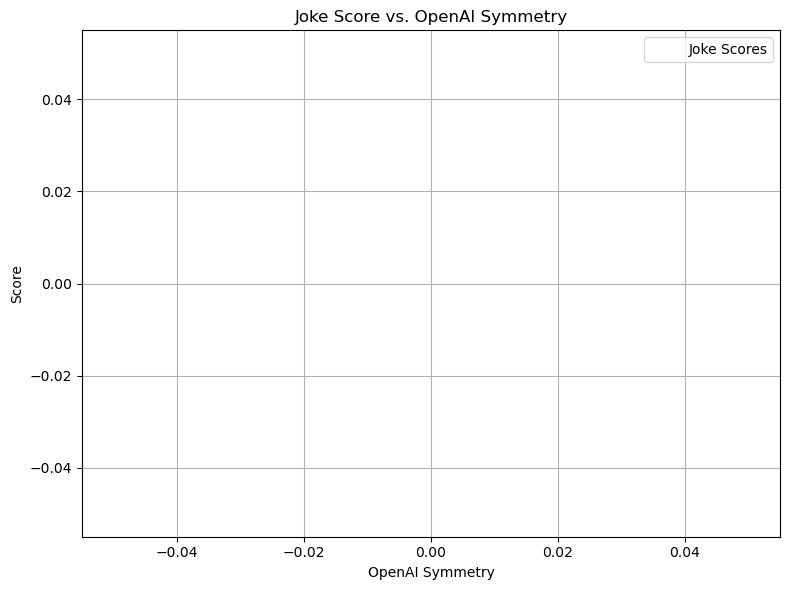

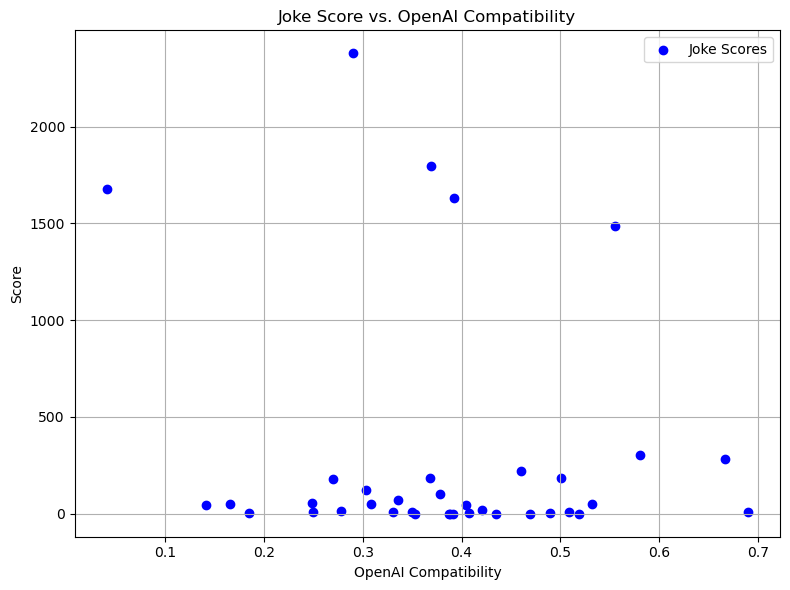

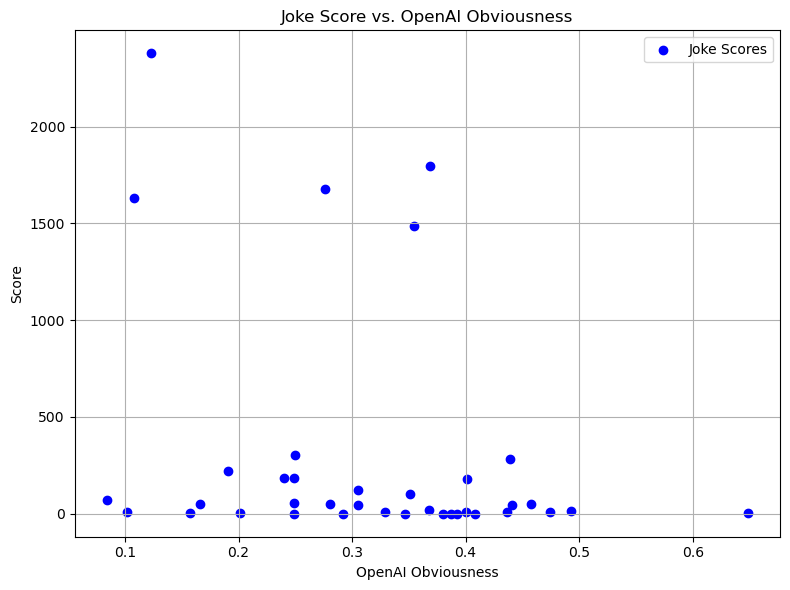

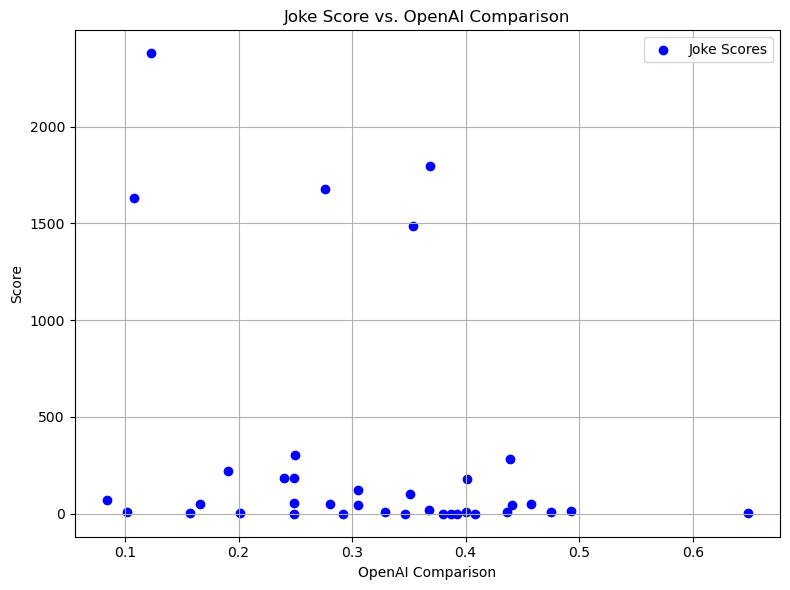

In [29]:

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_symmetry'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Symmetry')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Symmetry')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_compatibility'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Compatibility')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Compatibility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_obviousness'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Obviousness')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Obviousness')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_comparison'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Comparison')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Comparison')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


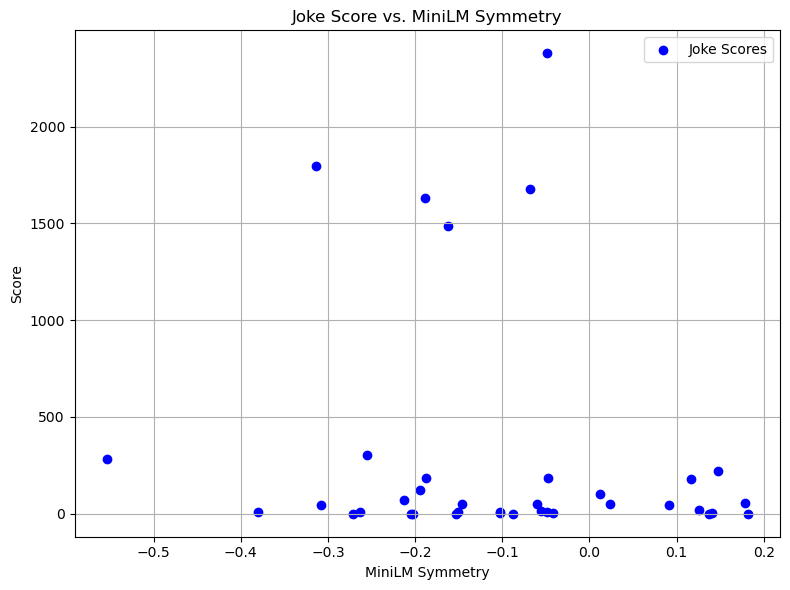

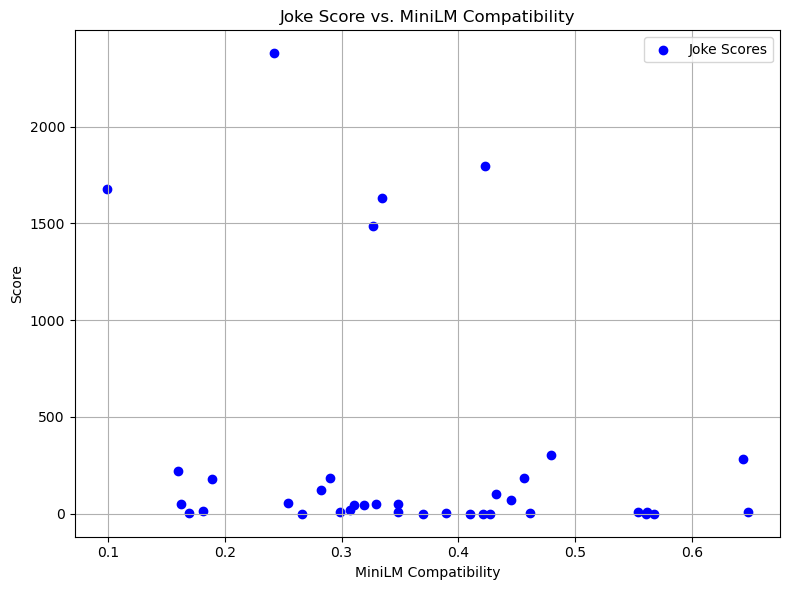

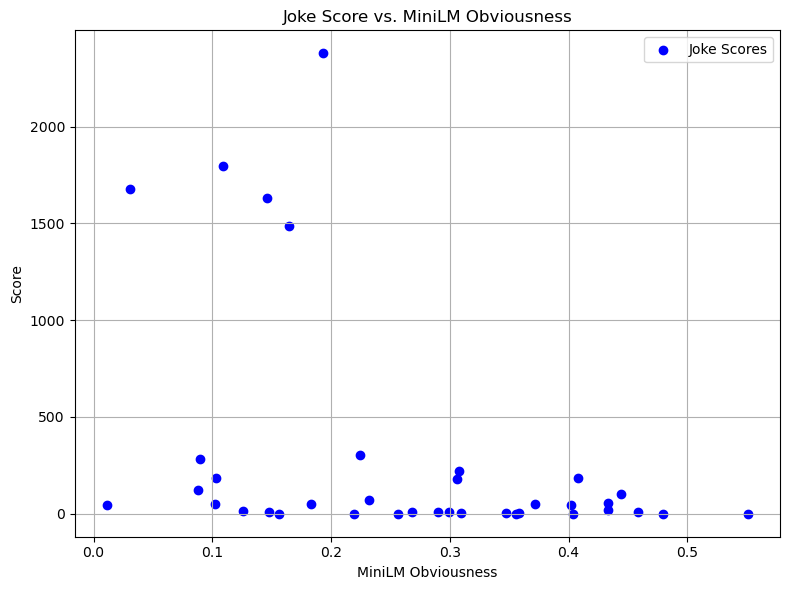

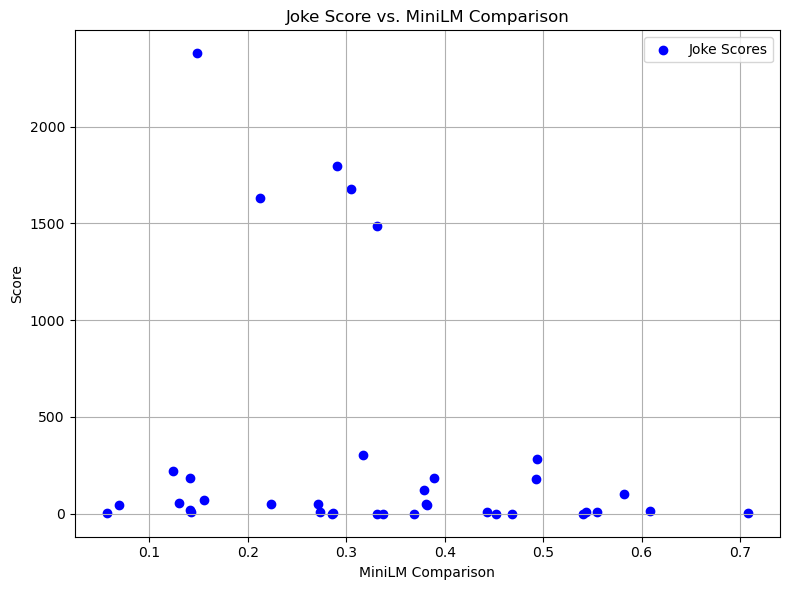

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_symmetry'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Symmetry')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Symmetry')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_compatibility'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Compatibility')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Compatibility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_obviousness'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Obviousness')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Obviousness')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_comparison'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Comparison')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Comparison')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [46]:
jokes = pd.read_csv('combined_dataframe_only_with_questionmarks_only_good_explanations_manuallyfiltered_EMBEDDINGS_minilm_openai_COMPLETE_with_score_and_metrics_ONLY_ALL_CLASSES_MANUALLY_CLEANED_embeds_metrics_euclid_dist.csv')



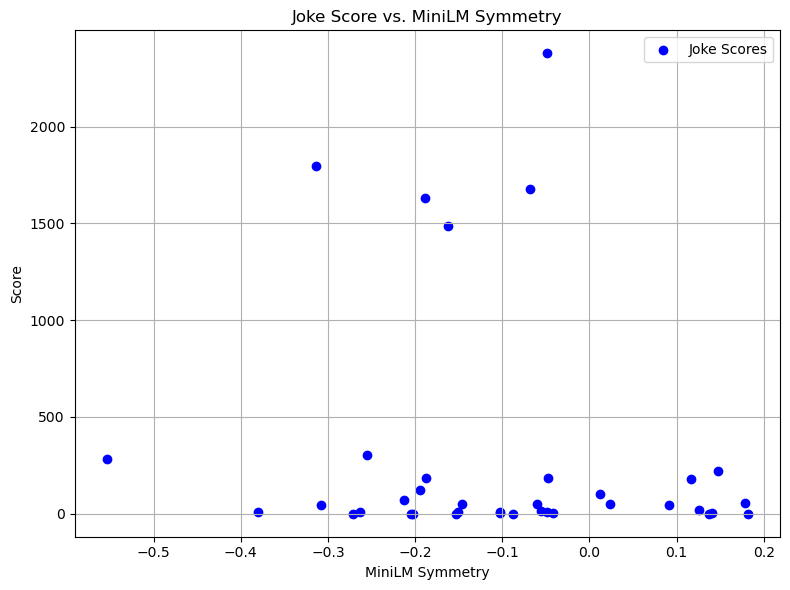

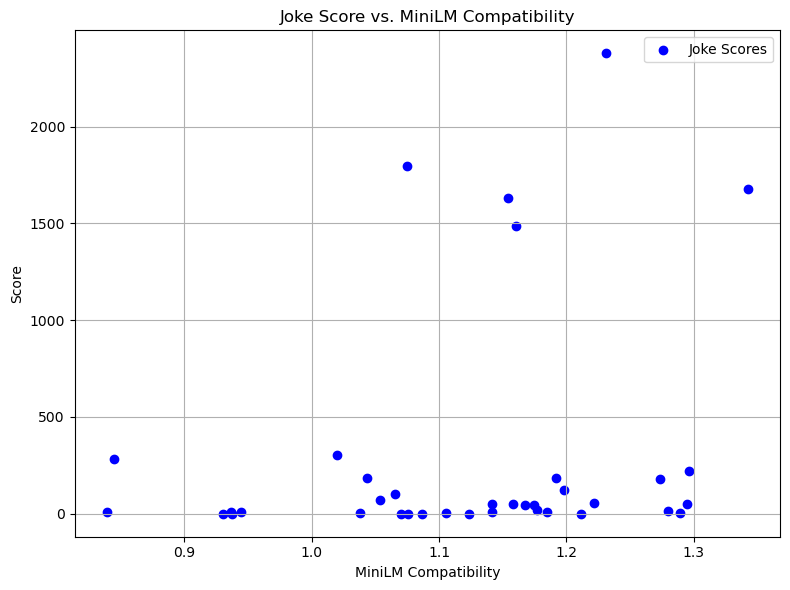

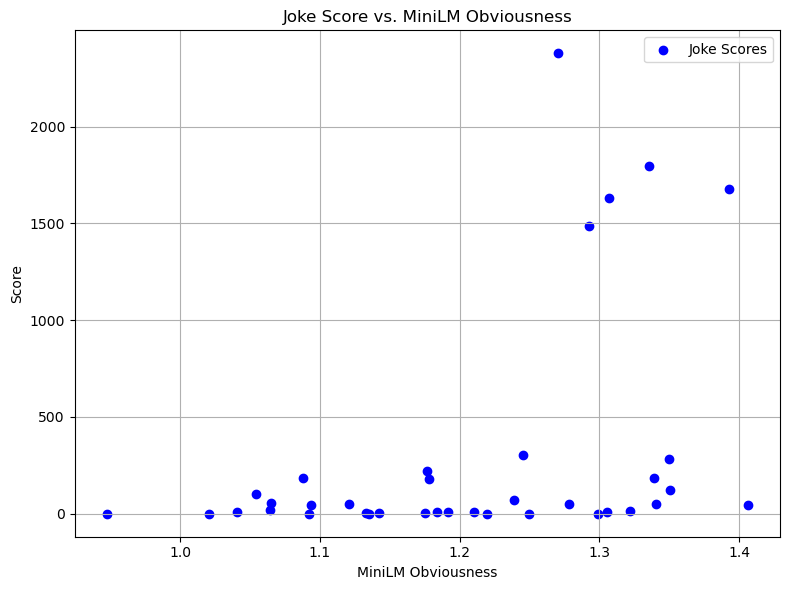

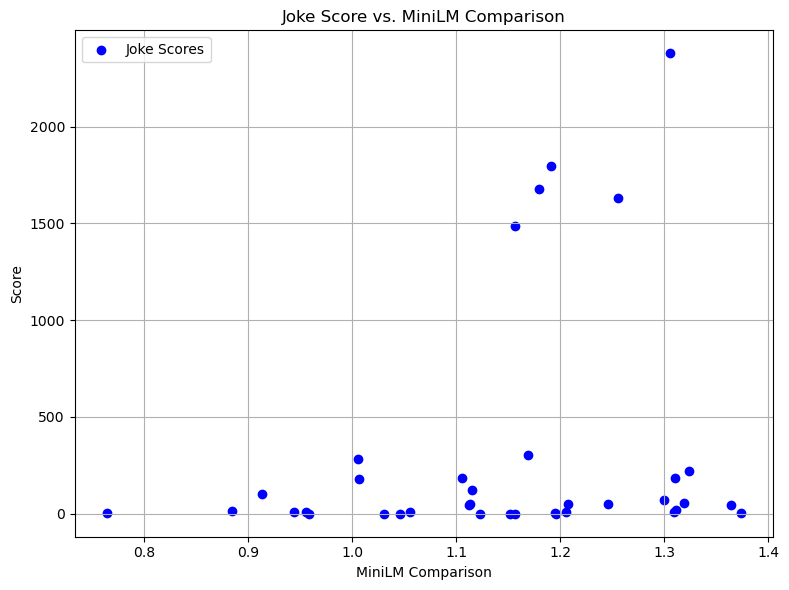

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_symmetry_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Symmetry')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Symmetry')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_compatibility_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Compatibility')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Compatibility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_obviousness_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Obviousness')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Obviousness')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_comparison_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Comparison')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Comparison')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


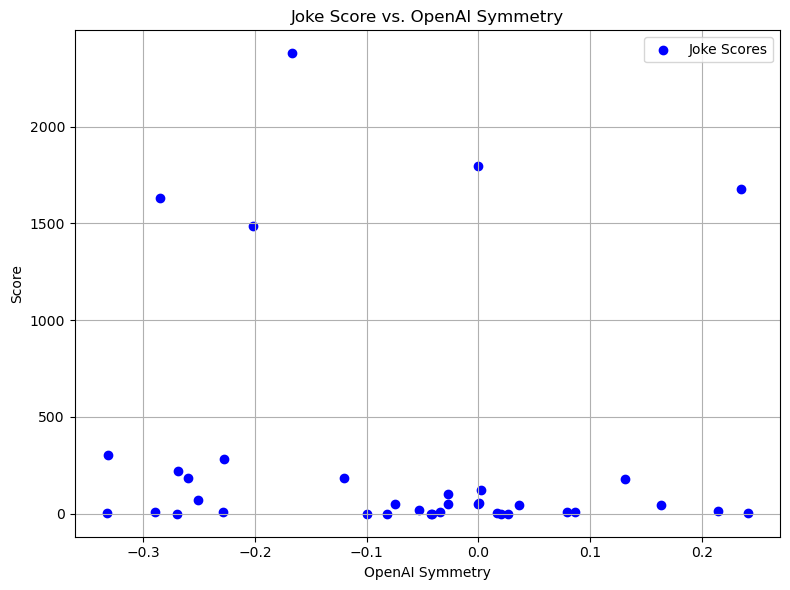

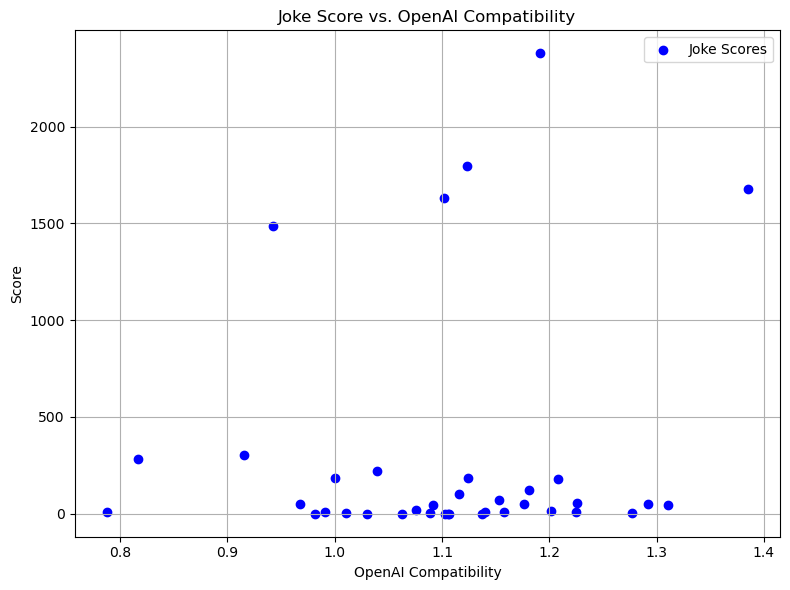

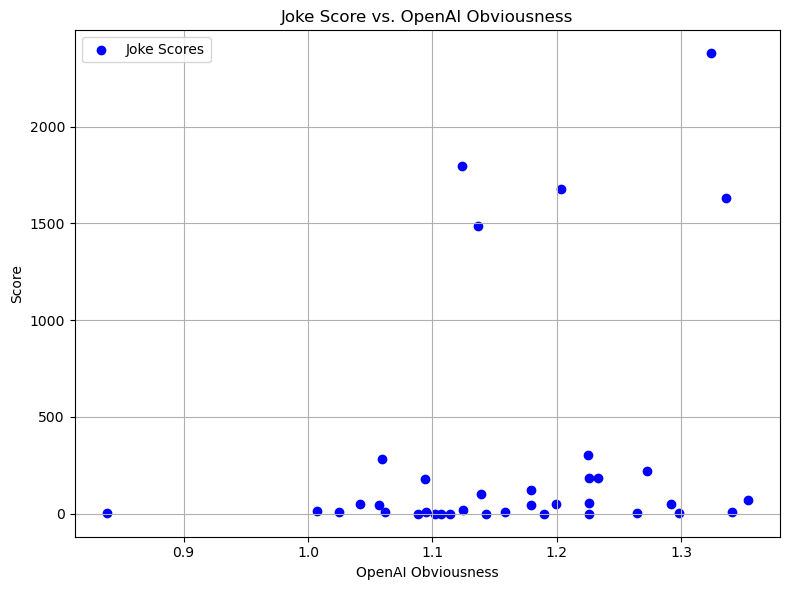

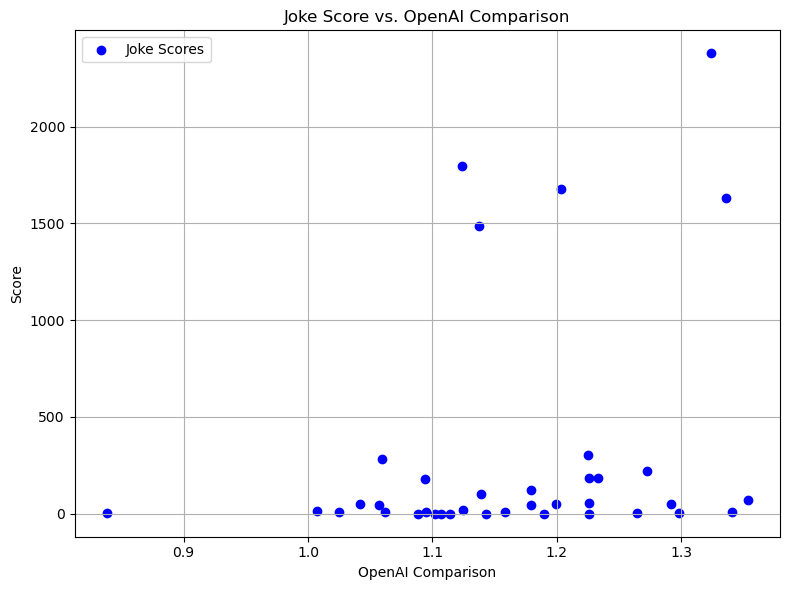

In [48]:

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_symmetry_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Symmetry')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Symmetry')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_compatibility_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Compatibility')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Compatibility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_obviousness_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Obviousness')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Obviousness')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_comparison_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Comparison')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Comparison')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
